In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/'
anndata_objects = []
name_anndata = "A1-1"+"/"+"anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "A1-2"+"/"+"anndataNucA12"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "C2"+"/"+"anndataNucC2"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "D2-1"+"/"+"anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "PS"+"/"+"ps_slice"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
samples = ["A1-1", "A1-2", "C2", "D2-1", "PS"]

In [3]:
# Give Leiden clusters unique numbers over all samples
nr_leiden_clusters = []
for i in range(len(anndata_objects)):
    nr_leiden_clusters.append(len(np.unique(anndata_objects[i].obs['leiden'])))
    anndata_objects[i].obs['leiden'] = anndata_objects[i].obs['leiden'].astype(int) + sum(nr_leiden_clusters[:i])
    anndata_objects[i].obs['leiden'] = anndata_objects[i].obs['leiden'].astype(str)
    anndata_objects[i].obs['leiden'] = anndata_objects[i].obs['leiden'].astype('category')

In [4]:
anndata_samples_together = anndata_objects[0].concatenate(anndata_objects[1],anndata_objects[2],anndata_objects[3],anndata_objects[4])

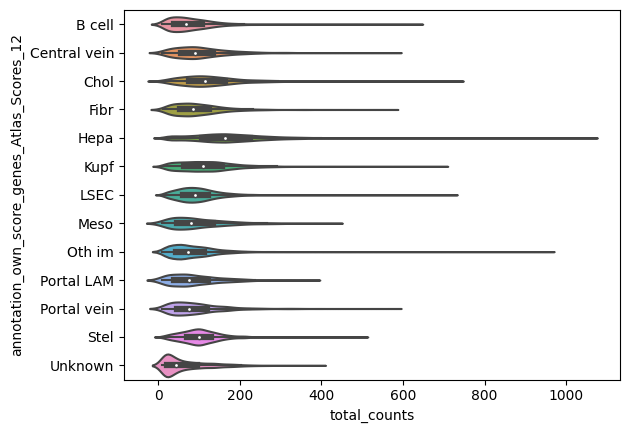

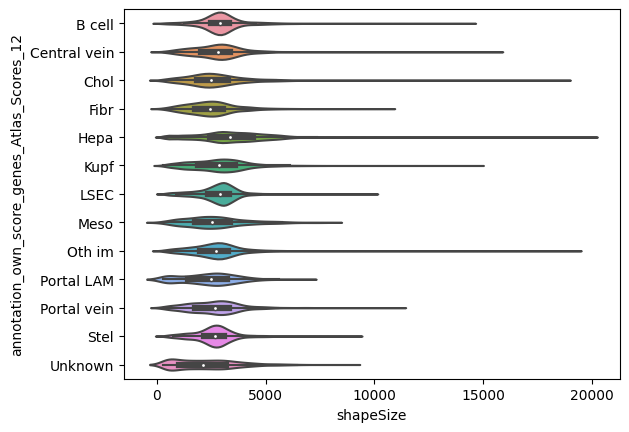

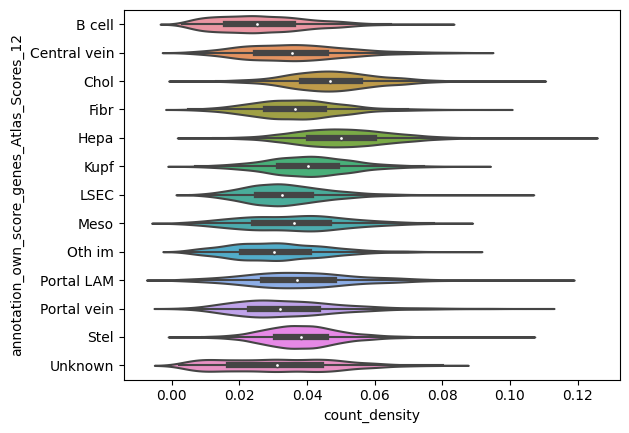

In [5]:
anndata = anndata_samples_together
annotation = 'annotation_own_score_genes_Atlas_Scores_12'
sns.violinplot(data=anndata.obs,x="total_counts",y=annotation)
plt.show()
sns.violinplot(data=anndata.obs,x="shapeSize",y=annotation)
plt.show()
anndata.obs['count_density'] = anndata.obs['total_counts'] / anndata.obs['shapeSize']
sns.violinplot(data=anndata.obs,x="count_density",y=annotation)
plt.show()

In [6]:
annotation = 'annotation_score_genes_original_Atlas_Scores_12'
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/AtlasSecondLevelScores.csv"
name = 'Atlas Scores'
# drop first 11 characters
annotation_scores = annotation[11:]

Text(0.5, 1.0, 'Score correlation matrix Atlas Scores')

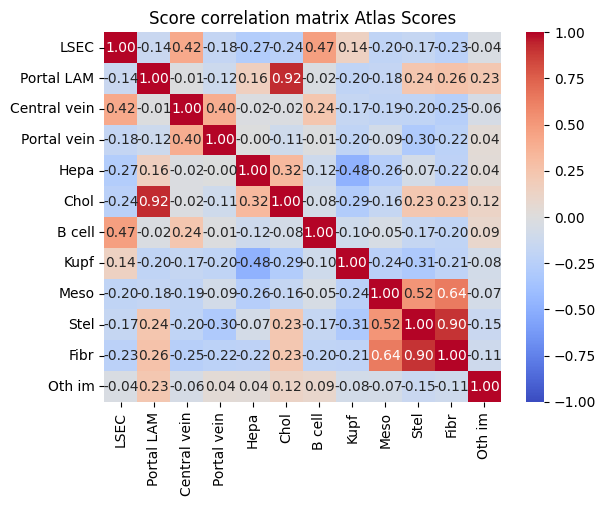

In [7]:
corr_matrices = []
for anndata in anndata_objects:
    scores = anndata.uns[annotation_scores]
    corr_matrix = scores.corr(method='pearson')
    corr_matrices.append(corr_matrix)   
# average df in corr_matrices
average_corr_matrix = sum(corr_matrices)/len(corr_matrices)
average_corr_matrix
# make heatmap
sns.heatmap(average_corr_matrix, annot=True,fmt='.2f',vmin=-1, vmax=1, cmap='coolwarm')
# add title
plt.title('Score correlation matrix '+name)

LSEC            35.043773
Portal LAM      38.318140
Central vein    30.194304
Portal vein     23.242989
Hepa            38.836789
Chol            44.781174
B cell          25.424346
Kupf            90.001786
Meso            50.835620
Stel            95.425520
Fibr            92.048523
Oth im          28.104598
dtype: float64


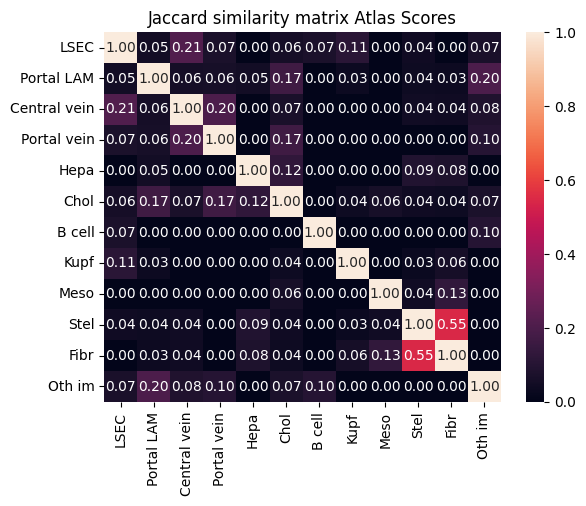

In [8]:
Jacc_m = Jaccard_similarity_matrix(path_mg,name)

Text(0.5, 1.0, 'Score correlation - Jaccard matrix Atlas Scores')

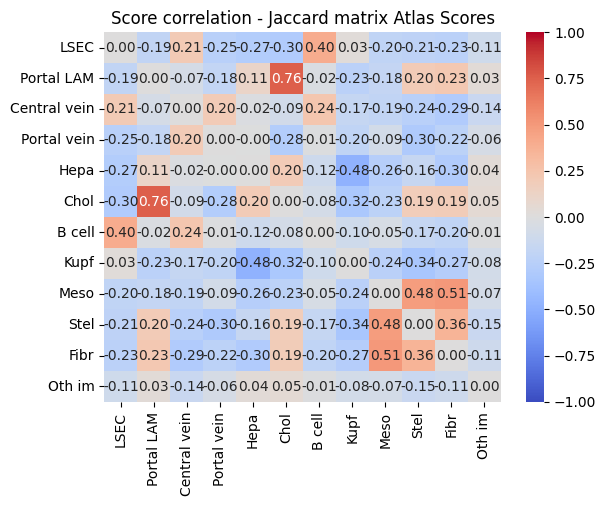

In [9]:
# subtract matrices
diff_matrix = average_corr_matrix - Jacc_m
sns.heatmap(diff_matrix, annot=True,fmt='.2f',vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Score correlation - Jaccard matrix '+name)

Meso
[]
Fibr
[(31, 0.81, 118, 'Fibr', 0.0), (67, 0.58, 89, 'Fibr', 0.0), (166, 0.75, 83, 'Fibr', 0.0), (241, 0.64, 25, 'Fibr', 0.0), (296, 0.78, 201, 'Fibr', 0.0), (423, 0.51, 138, 'Fibr', 0.0), (436, 0.73, 127, 'Fibr', 0.0), (606, 0.8, 83, 'Fibr', 0.0)]
Hepa
[(2, 0.98, 164, 'Hepa', 0.0), (5, 1.0, 148, 'Hepa', 0.0), (7, 0.99, 141, 'Hepa', 0.01), (9, 1.0, 139, 'Hepa', 0.0), (11, 0.98, 133, 'Hepa', 0.0), (12, 0.98, 133, 'Hepa', 0.0), (14, 0.98, 132, 'Hepa', 0.01), (16, 1.0, 131, 'Hepa', 0.0), (17, 0.99, 130, 'Hepa', 0.0), (18, 0.96, 130, 'Hepa', 0.01), (20, 1.0, 127, 'Hepa', 0.0), (21, 0.99, 125, 'Hepa', 0.0), (23, 0.71, 124, 'Hepa', 0.21), (24, 0.99, 123, 'Hepa', 0.0), (26, 0.97, 122, 'Hepa', 0.01), (28, 1.0, 120, 'Hepa', 0.0), (29, 0.99, 119, 'Hepa', 0.0), (32, 1.0, 118, 'Hepa', 0.0), (34, 0.99, 117, 'Hepa', 0.01), (35, 0.98, 115, 'Hepa', 0.02), (38, 1.0, 113, 'Hepa', 0.0), (39, 1.0, 110, 'Hepa', 0.0), (40, 0.98, 110, 'Hepa', 0.01), (41, 1.0, 108, 'Hepa', 0.0), (43, 0.83, 106, 'Hepa', 

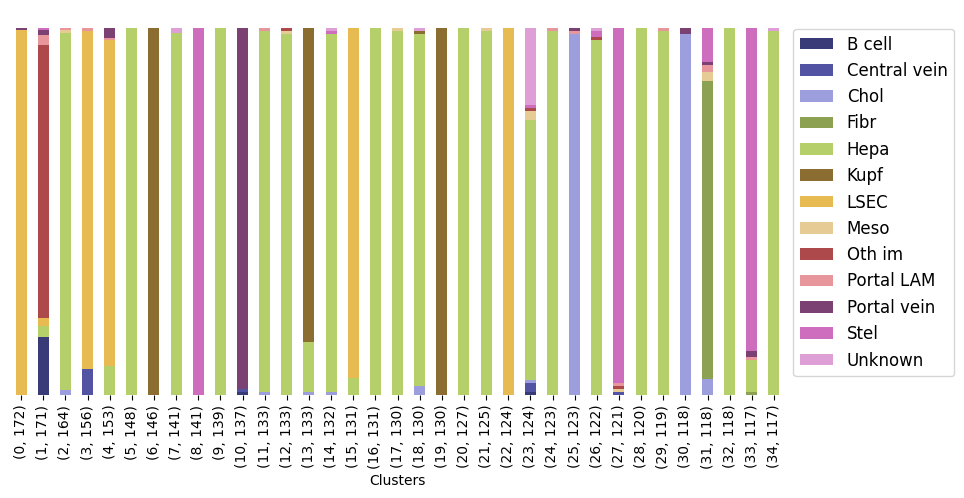

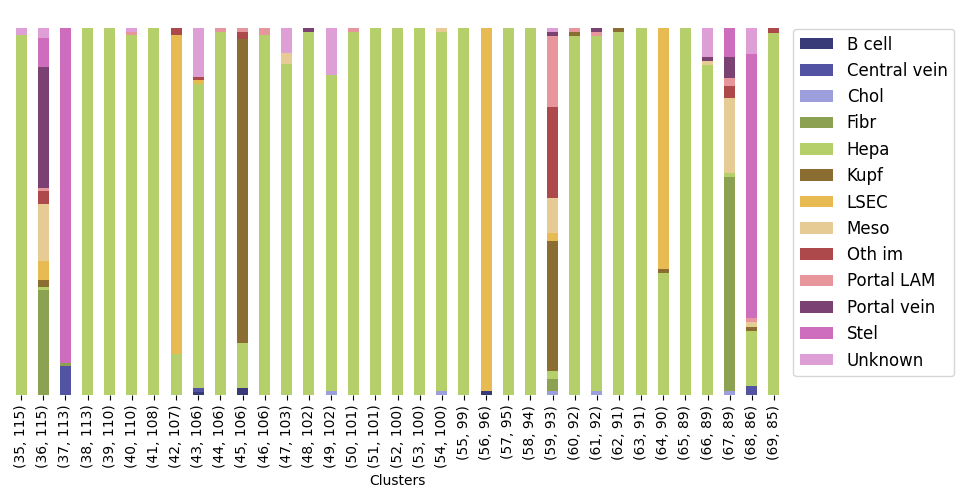

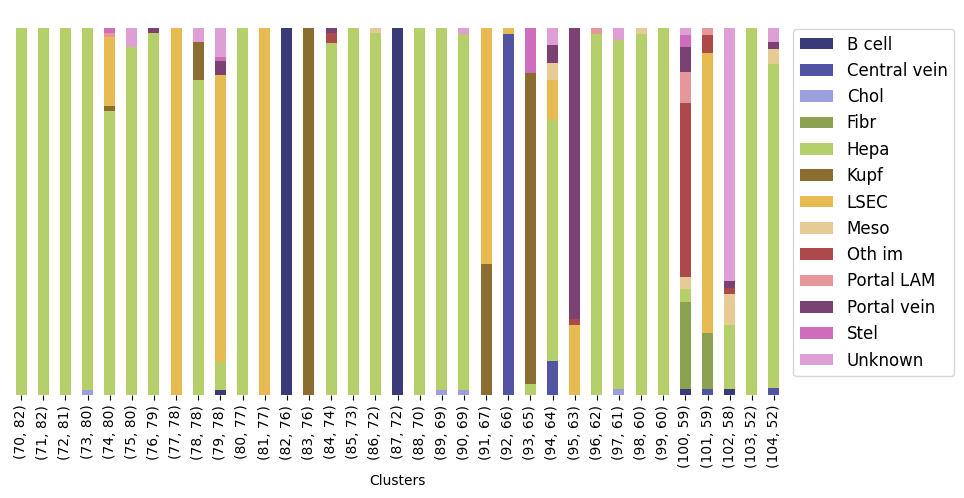

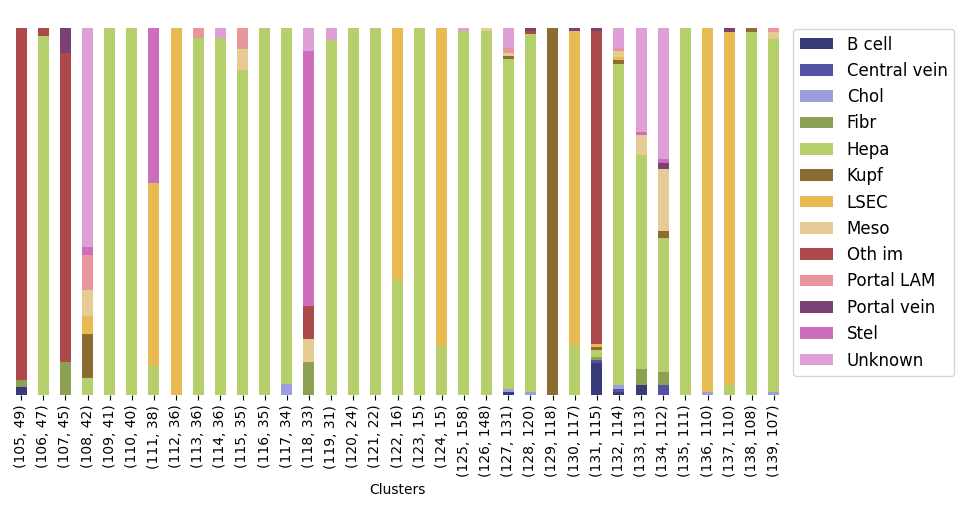

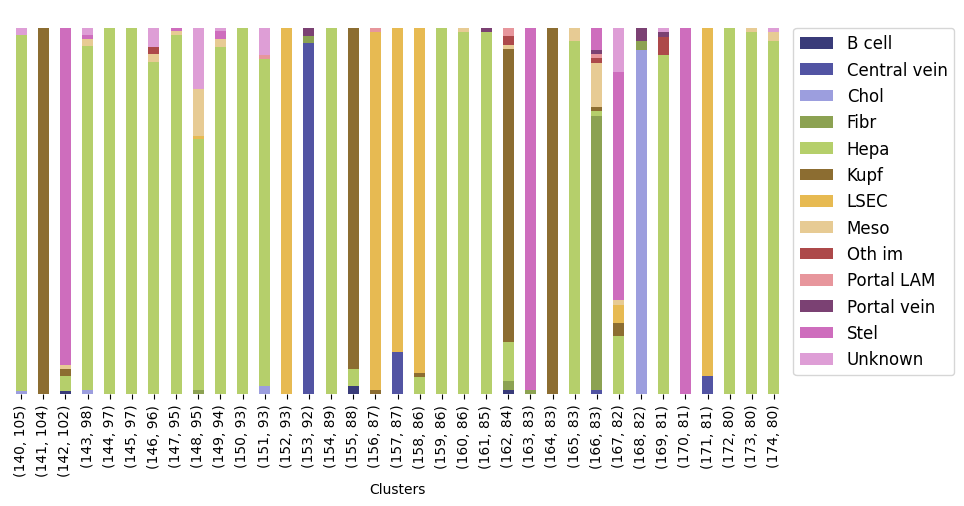

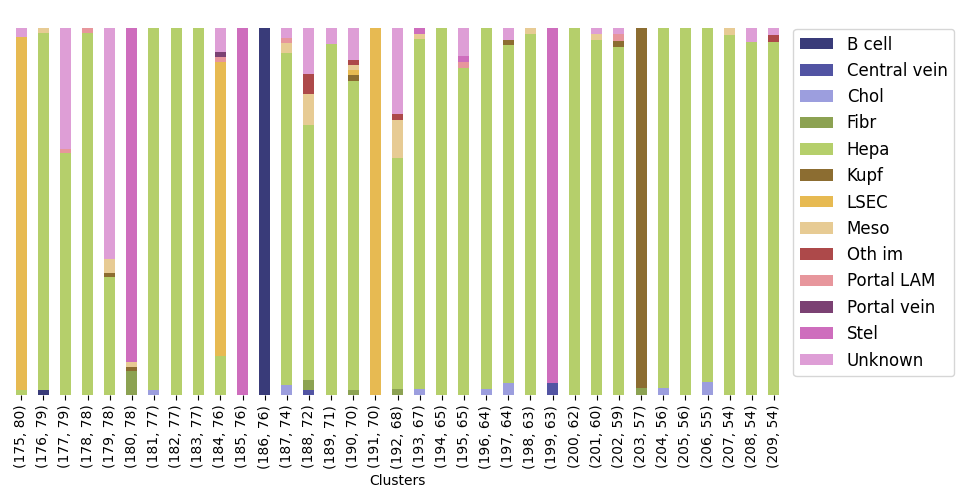

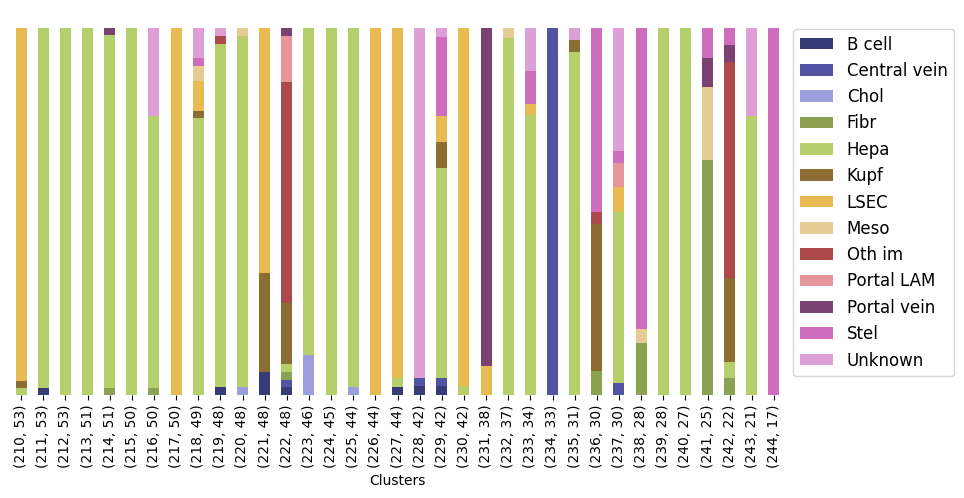

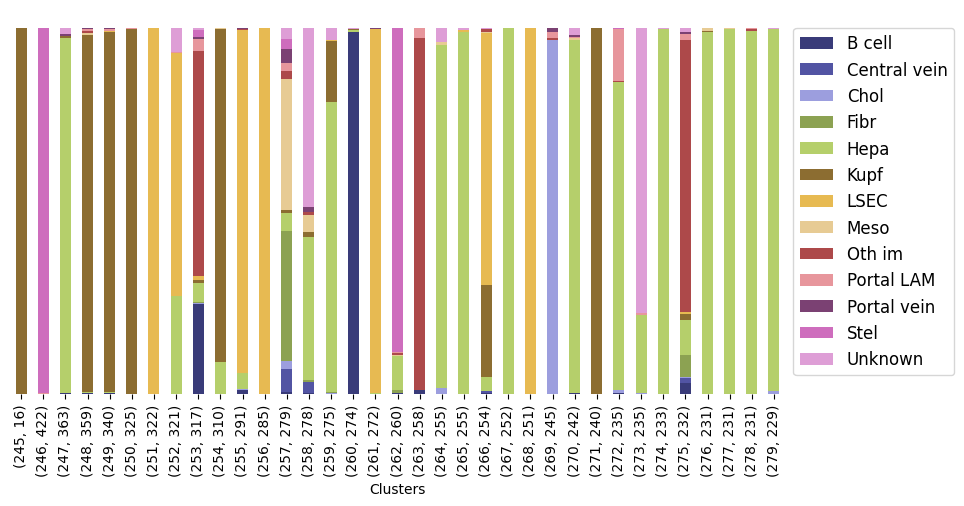

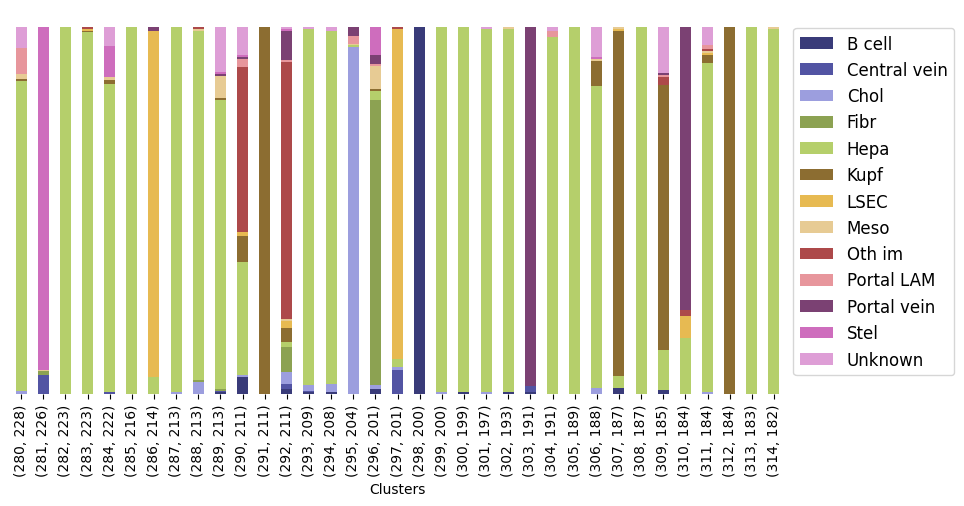

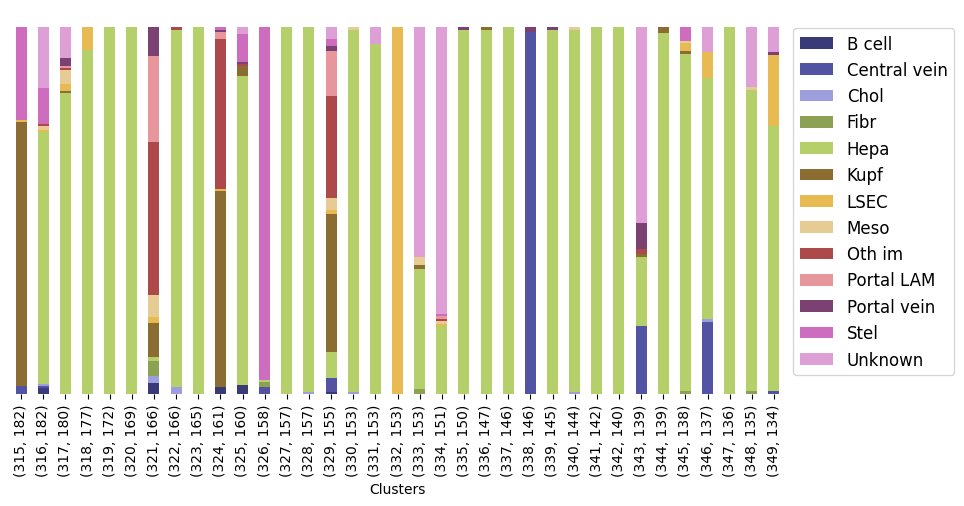

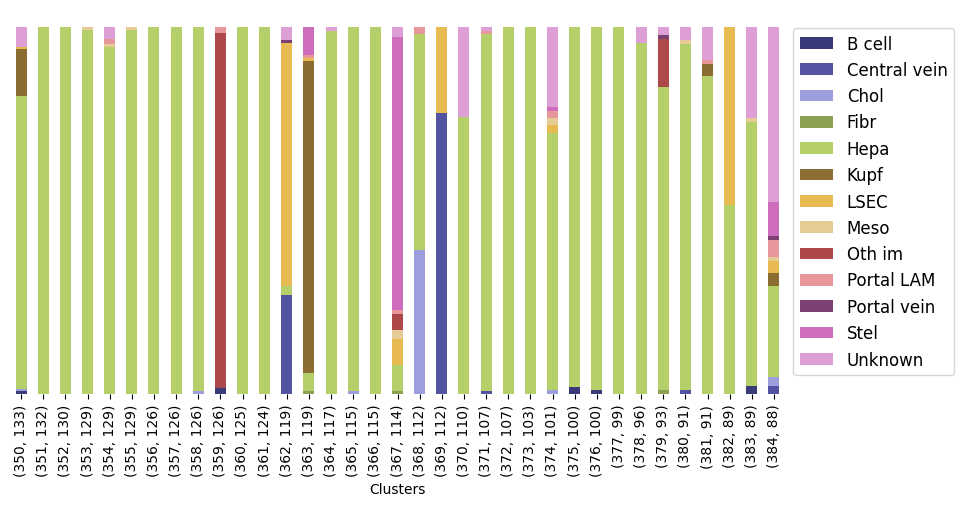

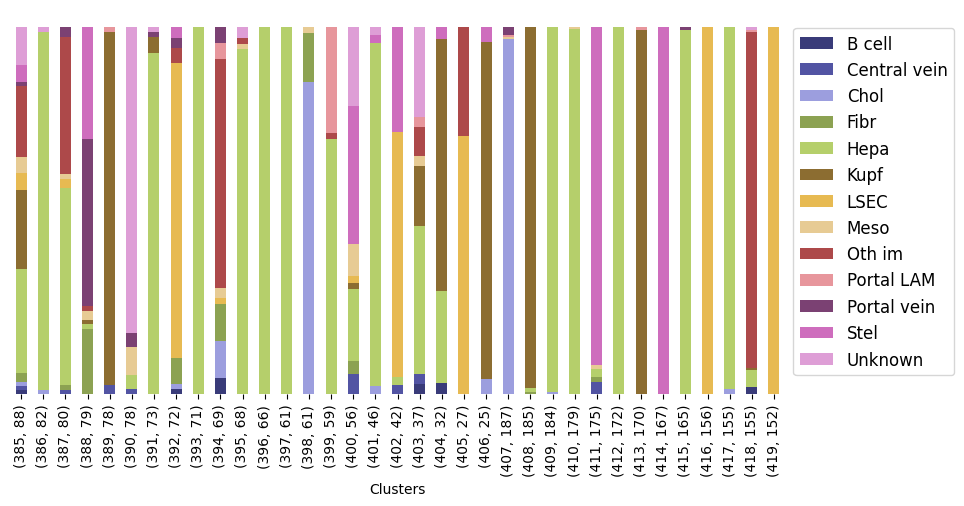

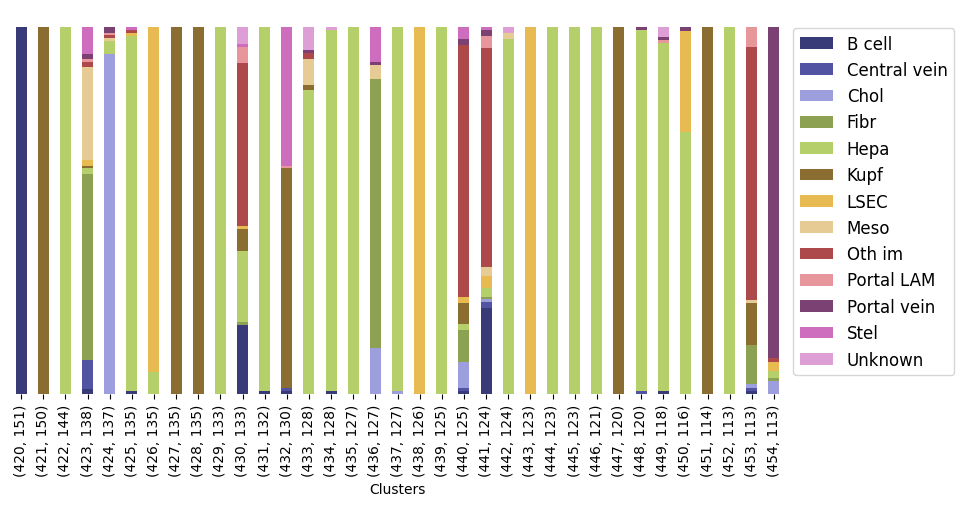

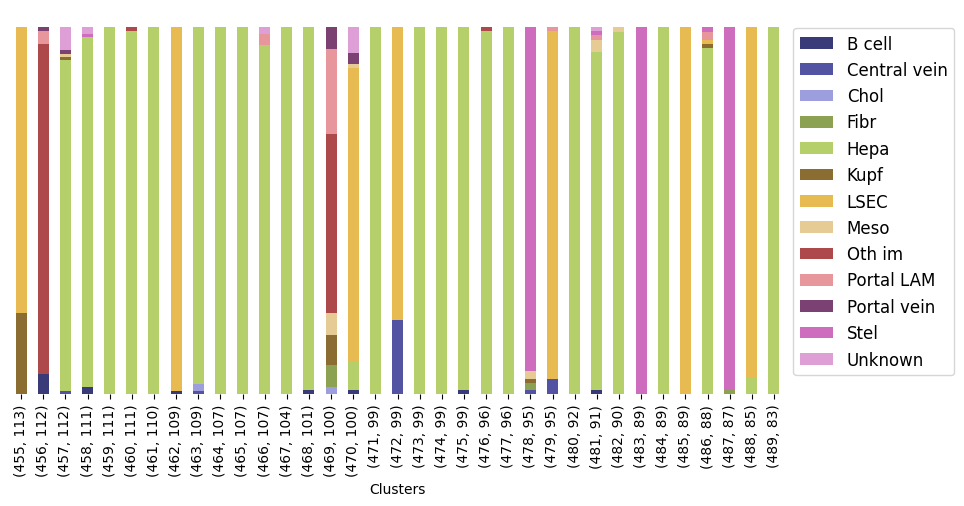

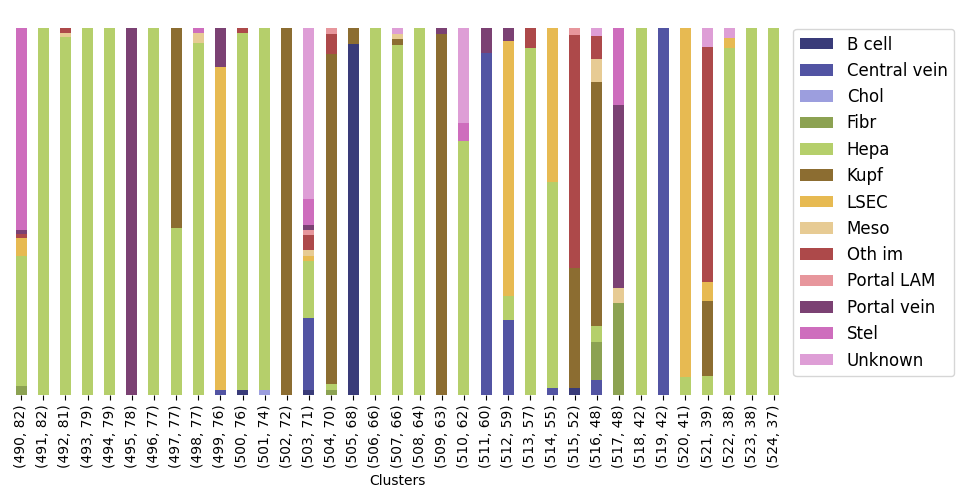

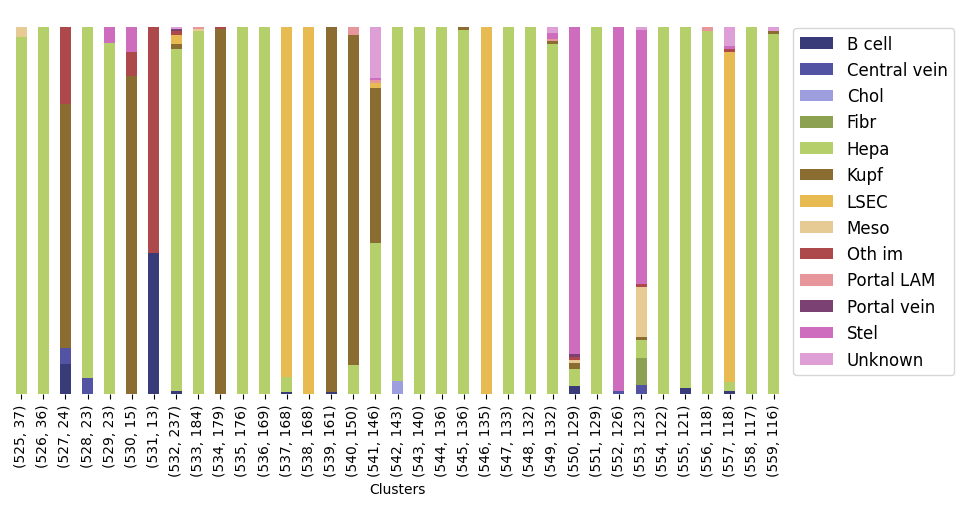

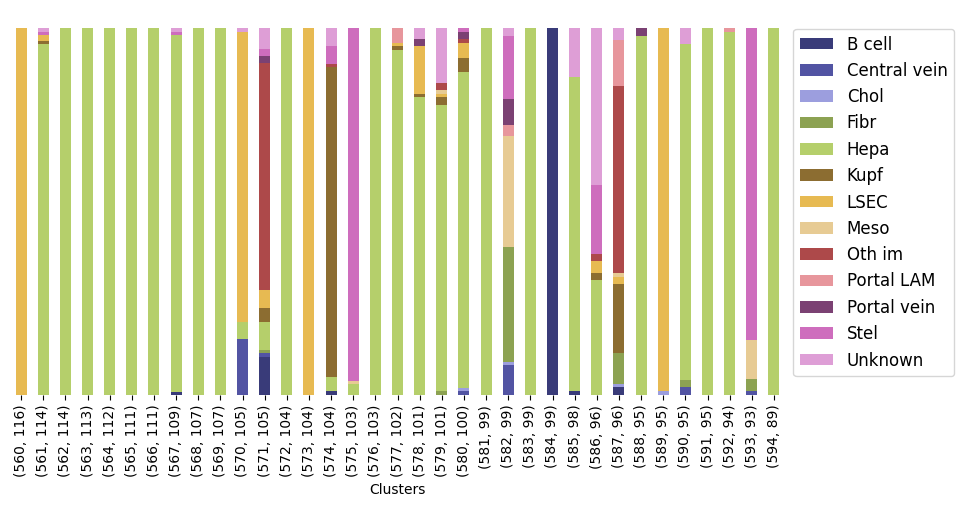

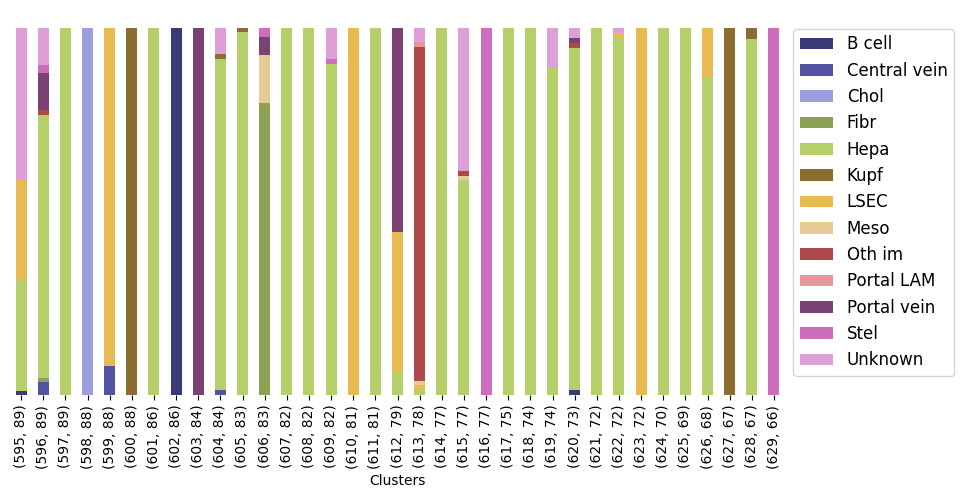

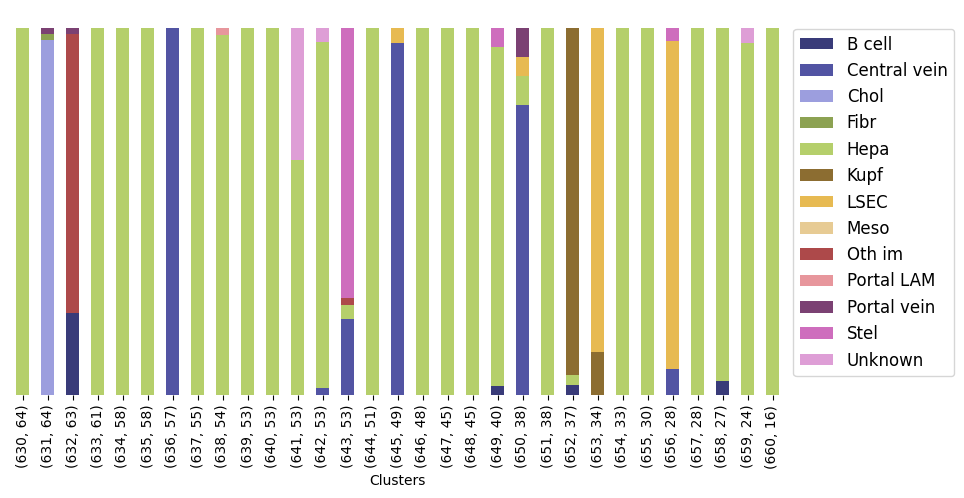

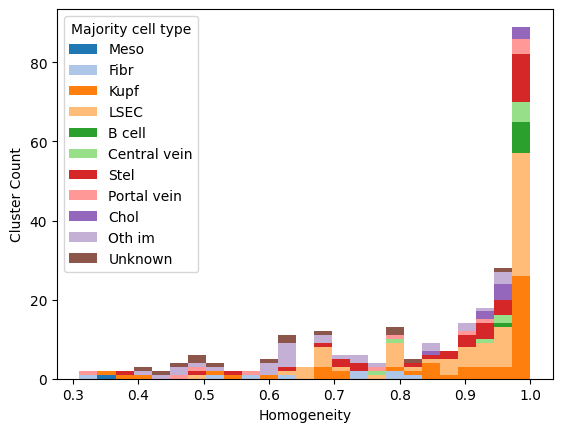

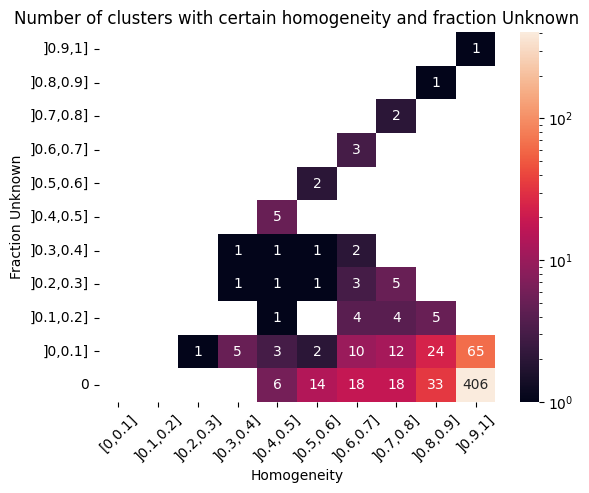

In [10]:
annotation = 'annotation_own_score_genes_Atlas_Scores_12'
cell_types = anndata_samples_together.obs[annotation].unique().tolist()  
# move 'Unknown' to last place
cell_types.remove('Unknown')
cell_types.append('Unknown')
# remove 'Hepa' from cell_types
cell_types_no_hepa = [x for x in cell_types if x != 'Hepa']
leiden_clusters_per_ct = clusteringVSleiden(anndata_samples_together,annotation,"leiden",cell_types=cell_types,print_results=True,cell_types_in_homog_plot=cell_types_no_hepa)